<a href="https://colab.research.google.com/github/wiem-azzabi/CNN_image_classification/blob/main/CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST dataset
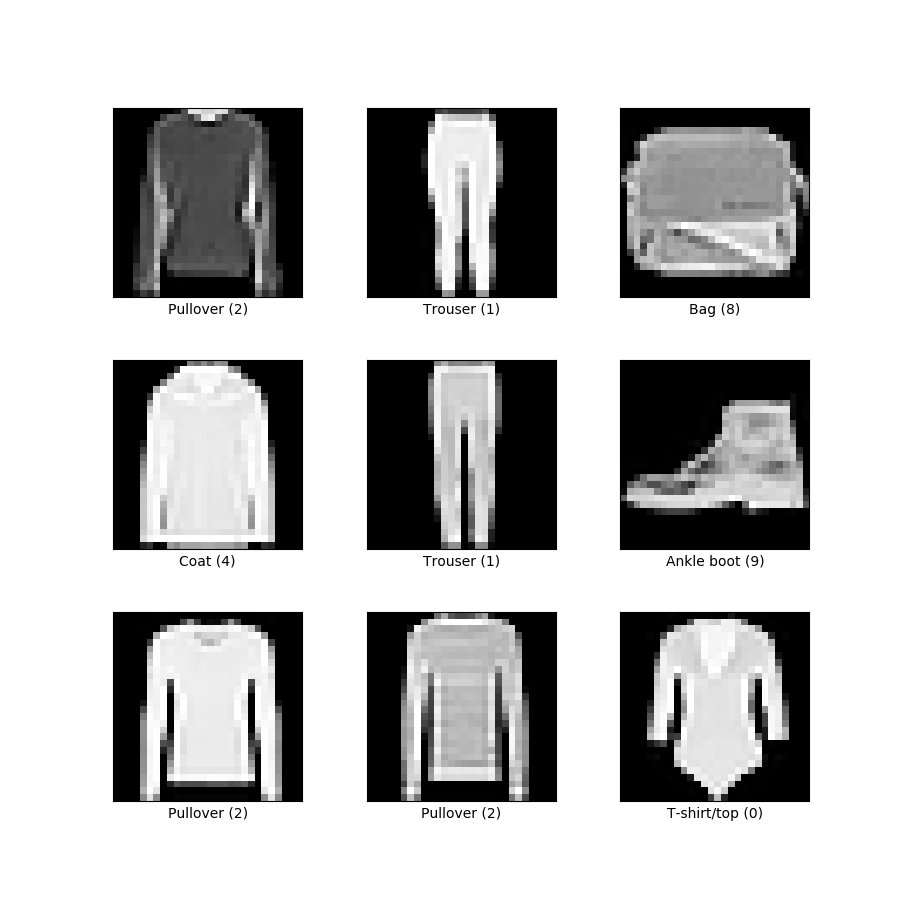

# Importing the dataset & preparing the data

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as k
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense , Dropout ,Flatten, Conv2D, MaxPooling2D

In [ ]:
batch_size = 64
epochs = 24


In [ ]:
img_rows, img_cols = 28, 28

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
len(x_train)+len(x_test)
#num_training_examples= 6000
#num_test_examples=1000

70000

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#reshaping into (6000,28,28,1)
x_train=x_train.reshape(x_train.shape[0],img_rows, img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows, img_cols,1)
#(28,28,1) 1 is because img are grey scaled (color=1D )

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
input_shape=(img_rows,img_cols,1)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [ ]:
#normalization (values [0:255]==>[0:1])
x_train /= 255
x_test /= 255


In [ ]:
import numpy as np

In [ ]:
np.unique(y_train)
#num classes = 10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
num_classes=10

In [ ]:
#one-hot encoding of label y
y_train=tf.keras.utils.to_categorical(y_train, num_classes)
y_test=tf.keras.utils.to_categorical(y_test, num_classes)

# CNN Code (Sequential Model+ 2D convolution)

In [ ]:
# Convolution 
# Relu (activation Layer)
# Pooling 
# Flattening
# Fully connected layer
# (Dropout Regularization)

In [ ]:
model = Sequential()

In [ ]:
#32 = nbre of filters 
#(3,3) feature detector shape

model.add(Conv2D(32, kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())#nxn matrix --> 1d matrix
#fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax')) #output layer 


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
hist= model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/24
938/938 [==============================] - 63s 67ms/step - loss: 0.5343 - accuracy: 0.8070 - val_loss: 0.4023 - val_accuracy: 0.8518
Epoch 2/24
938/938 [==============================] - 47s 50ms/step - loss: 0.3459 - accuracy: 0.8749 - val_loss: 0.3648 - val_accuracy: 0.8645
Epoch 3/24
938/938 [==============================] - 48s 51ms/step - loss: 0.2998 - accuracy: 0.8902 - val_loss: 0.3075 - val_accuracy: 0.8896
Epoch 4/24
938/938 [==============================] - 47s 50ms/step - loss: 0.2651 - accuracy: 0.9033 - val_loss: 0.2957 - val_accuracy: 0.8890
Epoch 5/24
938/938 [==============================] - 47s 50ms/step - loss: 0.2425 - accuracy: 0.9109 - val_loss: 0.2733 - val_accuracy: 0.8989
Epoch 6/24
938/938 [==============================] - 50s 53ms/step - loss: 0.2207 - accuracy: 0.9184 - val_loss: 0.2628 - val_accuracy: 0.9062
Epoch 7/24
938/938 [==============================] - 47s 50ms/step - loss: 0.2048 - accuracy: 0.9244 - val_loss: 0.2770 - val_accuracy:

In [ ]:
hist.history

{'loss': [0.534284234046936,
  0.3459043502807617,
  0.29981428384780884,
  0.2651163935661316,
  0.2424805611371994,
  0.22070680558681488,
  0.20482827723026276,
  0.1891699731349945,
  0.17551283538341522,
  0.1632833331823349,
  0.15109151601791382,
  0.13922300934791565,
  0.12900429964065552,
  0.11691027879714966,
  0.1098097413778305,
  0.1014135479927063,
  0.09395240992307663,
  0.0871143713593483,
  0.08121951669454575,
  0.07419973611831665,
  0.06641273945569992,
  0.06410729140043259,
  0.057112403213977814,
  0.05791446566581726],
 'accuracy': [0.8070499897003174,
  0.8749333620071411,
  0.8901500105857849,
  0.9032833576202393,
  0.9109166860580444,
  0.9184166789054871,
  0.9243500232696533,
  0.9288166761398315,
  0.934333324432373,
  0.9387500286102295,
  0.9435499906539917,
  0.948199987411499,
  0.9513166546821594,
  0.95660001039505,
  0.9589999914169312,
  0.9620000123977661,
  0.9643499851226807,
  0.9668499827384949,
  0.9701333045959473,
  0.9723666906356812,


In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])

Test loss=  0.4557036757469177
Test accuracy=  0.9088000059127808


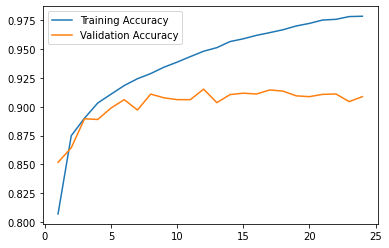

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
epoch_list=list(range(1,len(hist.history['accuracy'])+1))
plt.plot(epoch_list,hist.history['accuracy'],epoch_list,hist.history['val_accuracy'])
plt.legend(("Training Accuracy","Validation Accuracy"))
plt.show()

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1